#  Restricted Boltzmann Machines (RBMs) and Deep Belief Networks (DBNs) from scratch for representation learning on the MNIST dataset.

All of the code has been written based on "A Practical Guide to Training Restricted Boltzmann Machines" by Geoffrey Hinton and "A fast learning algorithm for deep belief nets" by Geoffrey Hinton et al. Both of the papers can be found at literature/.

The documentation of the code generated by Sphinx is located docs/. cd to docs/ then make html, then open index.html at docs/_build/html with your fav browser.

Some of the code is credited to the TAs and lecturers of DD2437 Artificial Neural Networks and Deep Architectures, who delivered an amazing set of lectures and laboratories. Thanks for all, it was really educational! The code was part of a laboratory, the description of which (with much of the theoretical background) is located at literature/.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util import *
from rbm import RestrictedBoltzmannMachine
from dbn import DeepBeliefNet

## RBMs for representation learning on the MNIST hand-written digits dataset

Train an RBM on the MNIST dataset with contrastive divergence with k=1 Gibbs sampling iteration, and observe the reconstruction loss over epochs.

The learned weigths are visualized and saved at rbm_viz/.


Starting a Restricted Boltzmann Machine with ndim_hidden: 400
learning CD1
iteration=      1 Reconstruction loss=24.8997
iteration=      2 Reconstruction loss=23.2396
iteration=      3 Reconstruction loss=22.8482
iteration=      4 Reconstruction loss=22.6004
iteration=      5 Reconstruction loss=22.4196
iteration=      6 Reconstruction loss=22.2729
iteration=      7 Reconstruction loss=22.1728
iteration=      8 Reconstruction loss=22.0807
iteration=      9 Reconstruction loss=21.9863
iteration=     10 Reconstruction loss=21.9375
iteration=     11 Reconstruction loss=21.8525
iteration=     12 Reconstruction loss=21.7874
iteration=     13 Reconstruction loss=21.7539
iteration=     14 Reconstruction loss=21.7150
iteration=     15 Reconstruction loss=21.7078
iteration=     16 Reconstruction loss=21.6598
iteration=     17 Reconstruction loss=21.5914
iteration=     18 Reconstruction loss=21.5690
iteration=     19 Reconstruction loss=21.5532
iteration=     20 Reconstruction loss=21.5392
iter

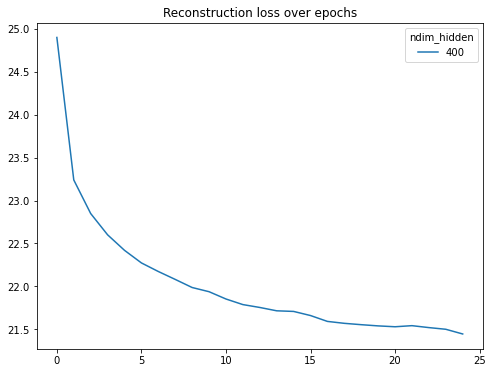

In [2]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

# To test something with far fewer data, therefore, in far less time.
"""indices = np.random.choice(train_imgs.shape[0], 100, replace=False)
train_imgs = train_imgs[indices, :]
train_lbls = train_lbls[indices, :]
print(train_imgs.shape)
print(train_lbls.shape)"""

epochs = 25
hidden = 400
print(f"\nStarting a Restricted Boltzmann Machine with ndim_hidden: {hidden}")


rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0]*image_size[1],
                                 ndim_hidden=hidden,
                                 is_bottom=True,
                                 image_size=image_size,
                                 is_top=False,
                                 n_labels=10,
                                 batch_size=15)

loss_history = rbm.cd1(visible_trainset=train_imgs, n_iterations=epochs)
    
plt.figure(figsize=(8,6))
plt.plot(range(epochs), loss_history, label=hidden)

plt.title("Reconstruction loss over epochs")
plt.legend(title="ndim_hidden")
plt.savefig(f'single_rbm/loss_ndim_hidden_{hidden}.png')
plt.show()

Train several RBMs with different number of hidden layers on the MNIST dataset with contrastive divergence with k=1 Gibbs sampling iteration, and observe the reconstruction loss over epochs for each hidden layer dimension.

The learned weigths are visualized and saved at rbm_viz/.


Starting a Restricted Boltzmann Machine with ndim_hidden: 200
learning CD1
iteration=      1 Reconstruction loss=25.7579
iteration=      2 Reconstruction loss=23.5841
iteration=      3 Reconstruction loss=23.1416
iteration=      4 Reconstruction loss=22.8369
iteration=      5 Reconstruction loss=22.6813
iteration=      6 Reconstruction loss=22.5333
iteration=      7 Reconstruction loss=22.4166
iteration=      8 Reconstruction loss=22.3309
iteration=      9 Reconstruction loss=22.2911
iteration=     10 Reconstruction loss=22.2149
iteration=     11 Reconstruction loss=22.1542
iteration=     12 Reconstruction loss=22.1240
iteration=     13 Reconstruction loss=22.1000
iteration=     14 Reconstruction loss=22.0624
iteration=     15 Reconstruction loss=22.0670
iteration=     16 Reconstruction loss=22.0194
iteration=     17 Reconstruction loss=21.9944
iteration=     18 Reconstruction loss=21.9661
iteration=     19 Reconstruction loss=21.9530
iteration=     20 Reconstruction loss=21.9444
iter

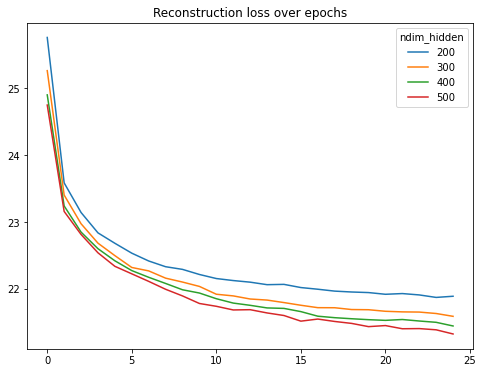

In [3]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

# To test something with far fewer data, therefore, in far less time.
"""indices = np.random.choice(train_imgs.shape[0], 100, replace=False)
train_imgs = train_imgs[indices, :]
train_lbls = train_lbls[indices, :]
print(train_imgs.shape)
print(train_lbls.shape)
"""


hidden_dims = [200, 300, 400, 500]
epochs = 25
loss_history = np.zeros((len(hidden_dims), epochs))
i = 0

for hidden in hidden_dims:
    print(f"\nStarting a Restricted Boltzmann Machine with ndim_hidden: {hidden}")
    rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0]*image_size[1],
                                 ndim_hidden=hidden,
                                 is_bottom=True,
                                 image_size=image_size,
                                 is_top=False,
                                 n_labels=10,
                                 batch_size=15)

    loss_history[i] = rbm.cd1(visible_trainset=train_imgs, n_iterations=epochs)
    i += 1

plt.figure(figsize=(8,6))

for plots in range(len(hidden_dims)):
    plt.plot(range(epochs), loss_history[plots], label=hidden_dims[plots])

plt.title("Reconstruction loss over epochs")
plt.legend(title="ndim_hidden")
plt.savefig(f'single_rbm/loss_ndim_hidden_compare.png')
plt.show()

## DBNs for representation learning on the MNIST hand-written digits dataset

### DBN training

Train the DBN (from the Hinton paper) on the MNIST dataset with contrastive divergence with k=1 Gibbs sampling iteration and greedy layer-wise training, and observe the reconstruction losses per layer per epoch over the process.

Also, save the trained weigths of the layers at trained_rbm/, so they can be loaded (for recognition and generation).

In [4]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

# To test something with far fewer data, therefore, in far less time.
"""np.random.seed(100)
indices = np.random.choice(train_imgs.shape[0], 10, replace=False)
train_imgs = train_imgs[indices, :]
train_lbls = train_lbls[indices, :]
print(train_imgs.shape)
print(train_lbls.shape)
"""

print("\nStarting a Deep Belief Net..")

dbn = DeepBeliefNet(sizes={"vis":image_size[0]*image_size[1], "hid":500, "pen":500, "top":2000, "lbl":10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=10)

dbn.train_greedylayerwise(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=100)


Starting a Deep Belief Net..
training vis--hid
learning CD1
iteration=      1 Reconstruction loss=20.1300
iteration=      2 Reconstruction loss=18.9214
iteration=      3 Reconstruction loss=18.6386
iteration=      4 Reconstruction loss=18.4246
iteration=      5 Reconstruction loss=18.3068
iteration=      6 Reconstruction loss=18.1555
iteration=      7 Reconstruction loss=18.0546
iteration=      8 Reconstruction loss=17.9434
iteration=      9 Reconstruction loss=17.8846
iteration=     10 Reconstruction loss=17.8601
iteration=     11 Reconstruction loss=17.8055
iteration=     12 Reconstruction loss=17.7280
iteration=     13 Reconstruction loss=17.6709
iteration=     14 Reconstruction loss=17.6557
iteration=     15 Reconstruction loss=17.6514
iteration=     16 Reconstruction loss=17.6075
iteration=     17 Reconstruction loss=17.5763
iteration=     18 Reconstruction loss=17.5704
iteration=     19 Reconstruction loss=17.5377
iteration=     20 Reconstruction loss=17.5266
iteration=     21 R

iteration=     79 Reconstruction loss=8.5224
iteration=     80 Reconstruction loss=8.4908
iteration=     81 Reconstruction loss=8.4810
iteration=     82 Reconstruction loss=8.4702
iteration=     83 Reconstruction loss=8.4776
iteration=     84 Reconstruction loss=8.4758
iteration=     85 Reconstruction loss=8.4519
iteration=     86 Reconstruction loss=8.4853
iteration=     87 Reconstruction loss=8.4538
iteration=     88 Reconstruction loss=8.4633
iteration=     89 Reconstruction loss=8.4510
iteration=     90 Reconstruction loss=8.4780
iteration=     91 Reconstruction loss=8.4552
iteration=     92 Reconstruction loss=8.4481
iteration=     93 Reconstruction loss=8.4367
iteration=     94 Reconstruction loss=8.4364
iteration=     95 Reconstruction loss=8.4364
iteration=     96 Reconstruction loss=8.4546
iteration=     97 Reconstruction loss=8.4042
iteration=     98 Reconstruction loss=8.4338
iteration=     99 Reconstruction loss=8.4094
iteration=    100 Reconstruction loss=8.3892
training p

### DBN as discriminative model

DBN as a recognition model. Check accuracy of recognition on the training and the test datasets.

In [5]:
print("Accuracy on training dataset is:")
dbn.recognize(train_imgs, train_lbls)

print("\nAccuracy on test dataset is:")
dbn.recognize(test_imgs, test_lbls)

Accuracy on training dataset is:
accuracy = 88.22%

Accuracy on test dataset is:
accuracy = 87.81%


### DBN as generative model

DBN as a generative model. Generate images from the learned posterior by labels.

Generation is done via alternating Gibbs sampling for k iterations (check dbn.py). There will be this many images generated. The generated images are stiched together and animated, and saved at dbn_mp4/.

Generating images by label with DBN...

Generated for label 0
Generated for label 1
Generated for label 2
Generated for label 3
Generated for label 4
Generated for label 5
Generated for label 6
Generated for label 7
Generated for label 8
Generated for label 9


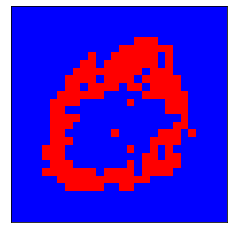

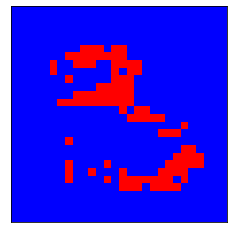

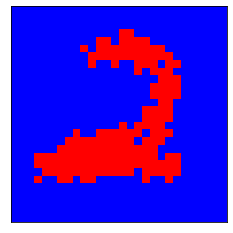

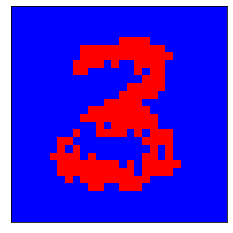

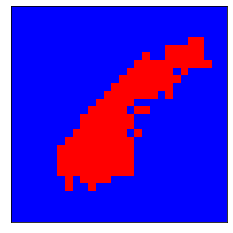

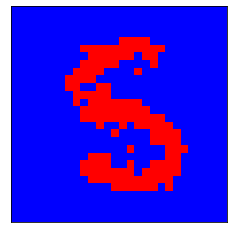

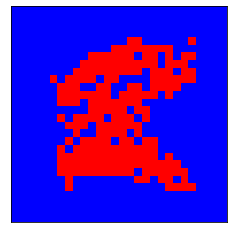

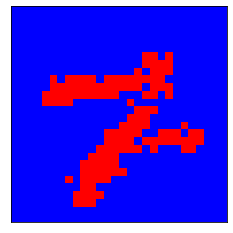

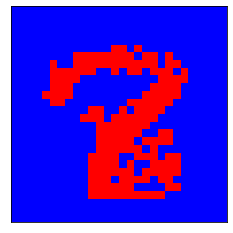

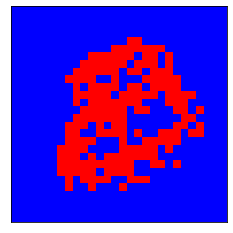

In [7]:
print("Generating images by label with DBN...\n")

for digit in range(10):
    digit_1hot = np.zeros(shape=(1,10))
    digit_1hot[0,digit] = 1
    print(f"Generated for label {digit}")
    dbn.generate(digit_1hot, name="rbms")

## TODO
1. Supervised fine-tuning of recognition weights of DBN with the wake-sleep algorithm
2. Momentum parameter update in RBM for more robust gradient-based optimization